In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Анализ и подготовка данных

## Загрузка и анализ данных

In [2]:
df = pd.read_csv('train.csv', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
def count_nn_feat(df):
    nn_features = df.isna().sum().sort_values(ascending=False)
    return nn_features[nn_features > 0]

In [5]:
nn_features = count_nn_feat(df)
nn_features

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

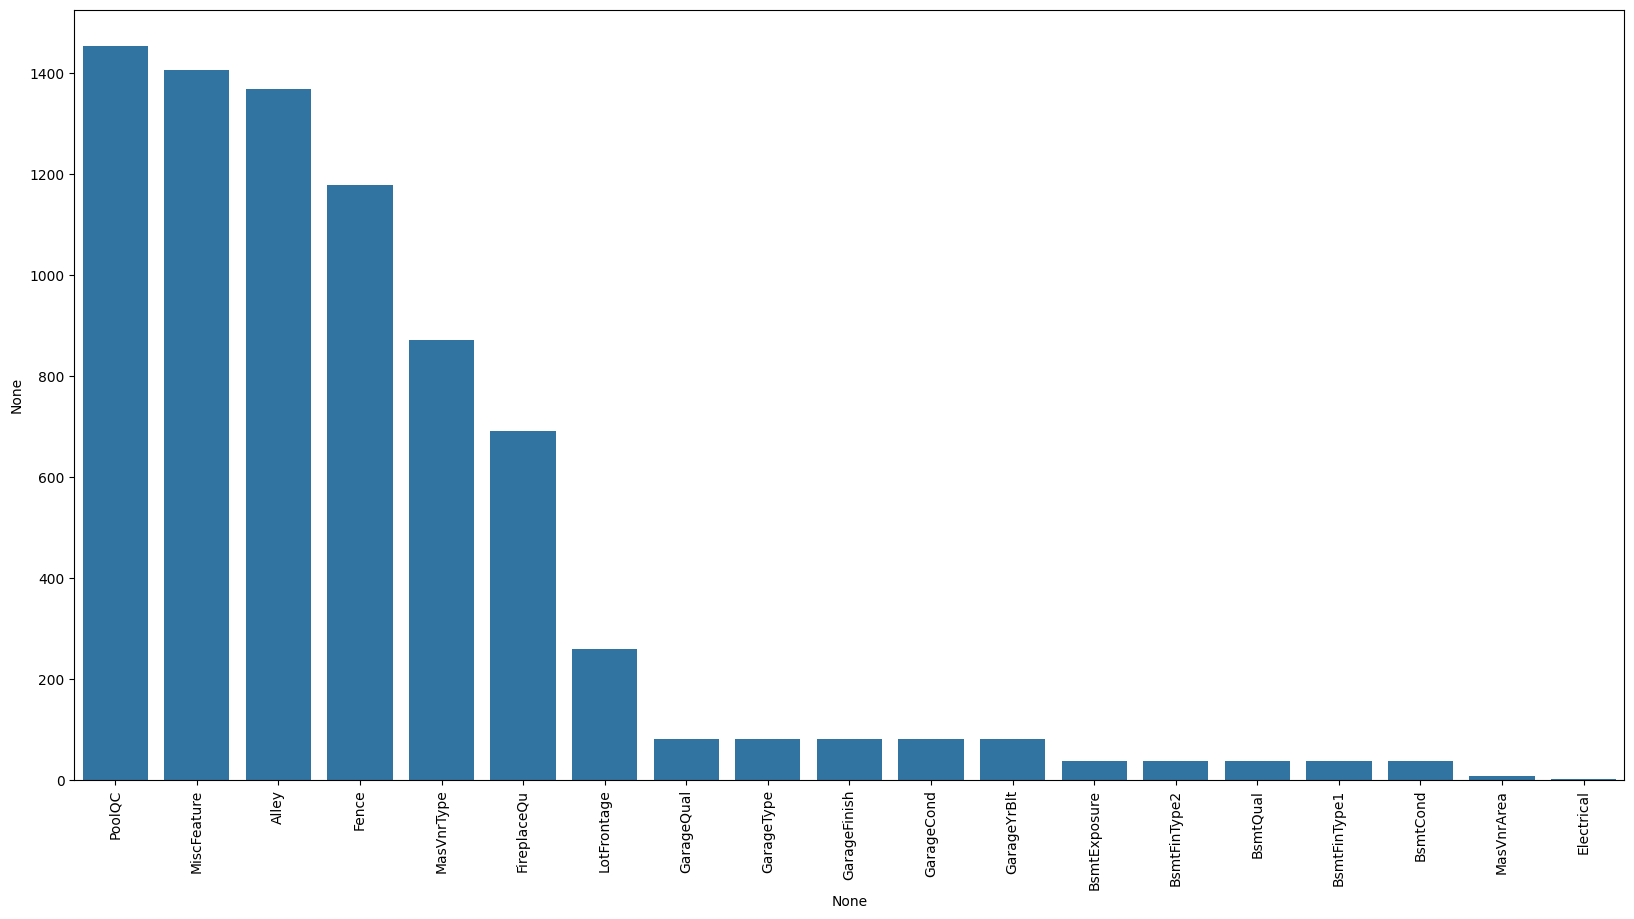

In [6]:
plt.figure(figsize=[20, 10])
sns.barplot(x=nn_features.index, y=nn_features)

plt.xticks(rotation=90);

In [7]:
def count_nn_feat_percents(df):
    nn_features_percents = (df.isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
    return nn_features_percents[nn_features_percents > 0]

In [8]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

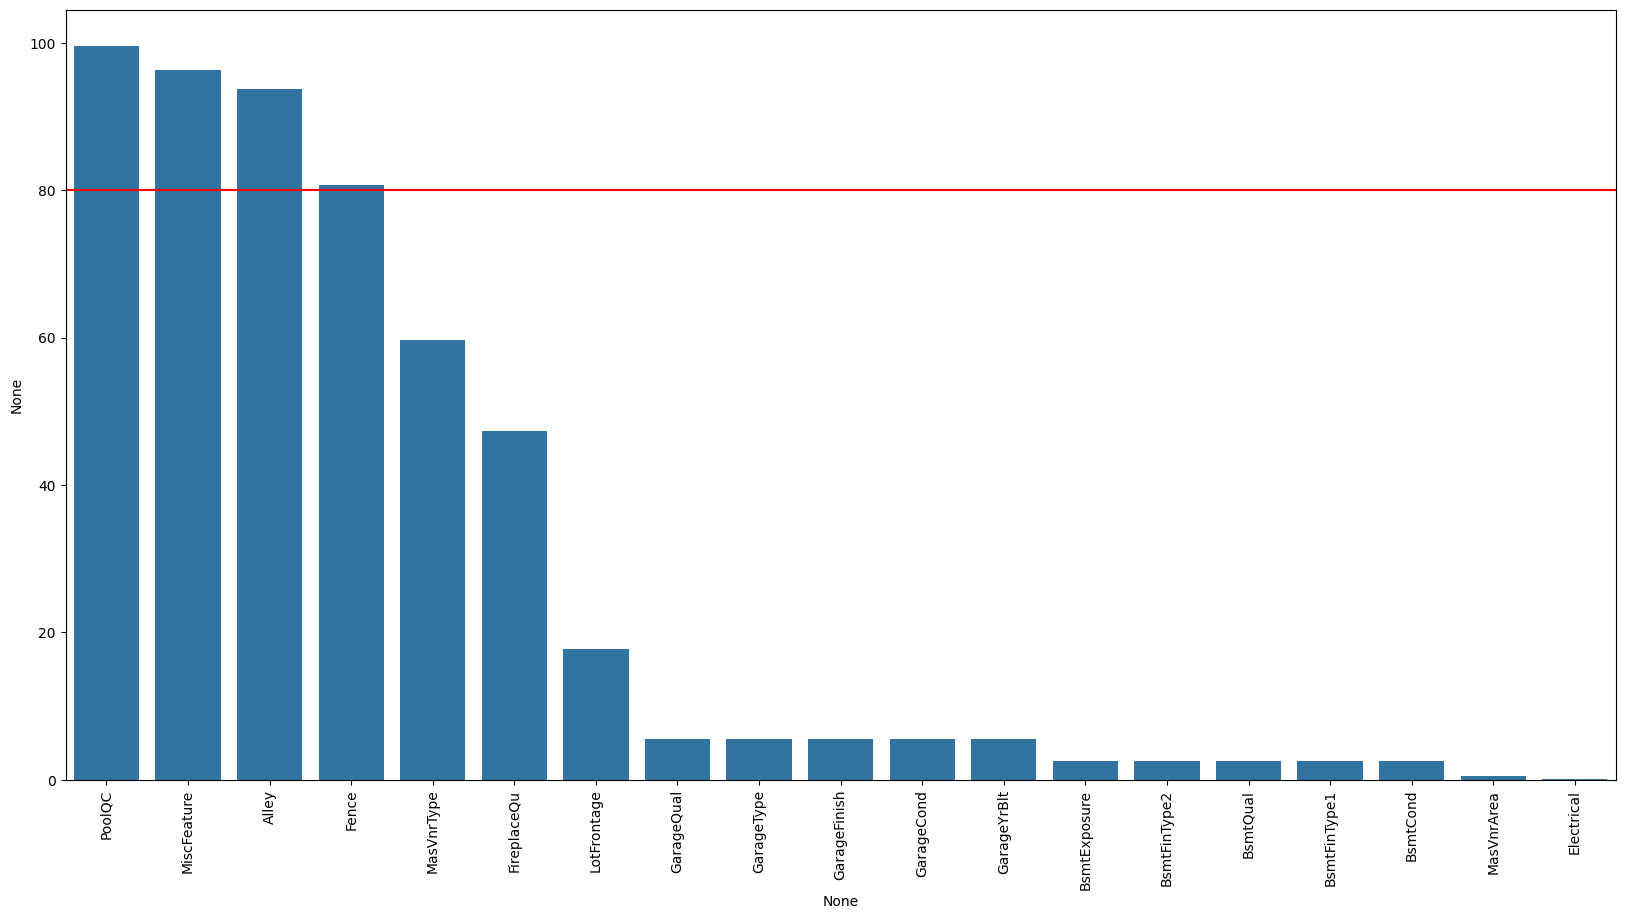

In [9]:
plt.figure(figsize=[20, 10])
sns.barplot(x=nn_features_percents.index, y=nn_features_percents)

plt.xticks(rotation=90);
plt.axhline(y=80, c='r')

In [10]:
df[nn_features.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   MasVnrType    588 non-null    object 
 5   FireplaceQu   770 non-null    object 
 6   LotFrontage   1201 non-null   float64
 7   GarageQual    1379 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageFinish  1379 non-null   object 
 10  GarageCond    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType2  1422 non-null   object 
 14  BsmtQual      1423 non-null   object 
 15  BsmtFinType1  1423 non-null   object 
 16  BsmtCond      1423 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  Electrical    1459 non-null   obj

In [11]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [12]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [13]:
100 / df.shape[0]

0.0684931506849315

In [14]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [15]:
df.MasVnrType = df.MasVnrType.fillna('None')

### 1) Работа с NaN

In [16]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [17]:
# Все строки в котором хотя бы одно значение NaN
df[df[nn_features_percents[3:].index].isna().any(axis=1)].loc[:, nn_features_percents[3:].index]

,GarageQual,GarageFinish,GarageType,GarageCond,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,Electrical
Id,,,,,,,,,,
18,TA,Unf,CarPort,TA,NaN,NaN,NaN,NaN,NaN,SBrkr
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FuseP
49,NaN,NaN,NaN,NaN,Unf,No,TA,TA,Unf,SBrkr
79,NaN,NaN,NaN,NaN,Unf,No,TA,TA,Unf,SBrkr
89,NaN,NaN,NaN,NaN,Unf,No,TA,Fa,Unf,SBrkr
...,...,...,...,...,...,...,...,...,...,...
1408,NaN,NaN,NaN,NaN,Unf,No,TA,TA,ALQ,SBrkr
1413,TA,Unf,Detchd,TA,NaN,NaN,NaN,NaN,NaN,FuseF
1450,NaN,NaN,NaN,NaN,Unf,Av,Gd,TA,GLQ,SBrkr


In [18]:
df[df[nn_features_percents[3:].index].isna().any(axis=1)].loc[:, nn_features_percents.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 18 to 1454
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   19 non-null     object 
 1   LotFrontage   101 non-null    float64
 2   GarageYrBlt   33 non-null     float64
 3   GarageQual    33 non-null     object 
 4   GarageFinish  33 non-null     object 
 5   GarageType    33 non-null     object 
 6   GarageCond    33 non-null     object 
 7   BsmtFinType2  76 non-null     object 
 8   BsmtExposure  76 non-null     object 
 9   BsmtQual      77 non-null     object 
 10  BsmtCond      77 non-null     object 
 11  BsmtFinType1  77 non-null     object 
 12  Electrical    113 non-null    object 
dtypes: float64(2), object(11)
memory usage: 12.5+ KB


In [19]:
df[df.Electrical.isna()].loc[:, nn_features_percents.index]

,FireplaceQu,LotFrontage,GarageYrBlt,GarageQual,GarageFinish,GarageType,GarageCond,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,Electrical
Id,,,,,,,,,,,,,
1380,NaN,73.0,2007.0,TA,Fin,BuiltIn,TA,Unf,No,Gd,TA,Unf,NaN


### FireplaceQu. Заполняю качество каминов NA потому что, пустые значения для качества каминов, там где нет каминов, следовательно ставим там NA

In [20]:
df[df.FireplaceQu.isna()][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
6,0,NaN
11,0,NaN
13,0,NaN
16,0,NaN
...,...,...
1453,0,NaN
1454,0,NaN
1455,0,NaN


In [21]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [22]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
Electrical       0.068493
dtype: float64

In [23]:
# Все строки в котором хотя бы одно значение NaN
df[df[nn_features_percents.index].isna().any(axis=1)].loc[:, nn_features_percents.index]

,LotFrontage,GarageType,GarageYrBlt,GarageQual,GarageCond,GarageFinish,BsmtFinType2,BsmtExposure,BsmtQual,BsmtFinType1,BsmtCond,Electrical
Id,,,,,,,,,,,,
8,NaN,Attchd,1973.0,TA,TA,RFn,BLQ,Mn,Gd,ALQ,TA,SBrkr
13,NaN,Detchd,1962.0,TA,TA,Unf,Unf,No,TA,ALQ,TA,SBrkr
15,NaN,Attchd,1960.0,TA,TA,RFn,Unf,No,TA,BLQ,TA,SBrkr
17,NaN,Attchd,1970.0,TA,TA,Fin,Unf,No,TA,ALQ,TA,SBrkr
18,72.0,CarPort,1967.0,TA,TA,Unf,NaN,NaN,NaN,NaN,NaN,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,NaN,Detchd,1916.0,Fa,Po,Unf,Unf,No,TA,Unf,TA,FuseF
1447,NaN,Attchd,1962.0,TA,TA,Unf,Unf,No,TA,Rec,TA,SBrkr
1450,21.0,NaN,NaN,NaN,NaN,NaN,Unf,Av,Gd,GLQ,TA,SBrkr


### Исследую признаки `GarageType, GarageYrBlt, GarageQual, GarageCond, GarageFinish`


In [24]:
df[df[['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish']].isna().any(axis=1)].loc[:, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish']]

,GarageType,GarageYrBlt,GarageQual,GarageCond,GarageFinish
Id,,,,,
40,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1350,NaN,NaN,NaN,NaN,NaN
1408,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [25]:
df[['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']] = df[['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']].fillna('NA')

In [26]:
df.GarageYrBlt.notna().astype(int).value_counts()

GarageYrBlt
1    1379
0      81
Name: count, dtype: int64

In [27]:
df['HasGarage'] = df.GarageYrBlt.notna().astype(int)

In [28]:
df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.median())

In [29]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

LotFrontage     17.739726
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
Electrical       0.068493
dtype: float64

### Исследую признаки `BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtQual, BsmtCond`

In [30]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']]


#df[df[['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish']].isna().any(axis=1)].loc[:, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
333,No,NaN,GLQ,Gd,TA
343,NaN,NaN,NaN,NaN,NaN


In [31]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].shape

(39, 5)

In [32]:
df.loc[[333]]['BsmtFinType2'] = df.BsmtFinType2.mode() # = df.loc[333].fillna(df.BsmtFinType2.mode())

In [33]:
# df.loc[[333]]['BsmtFinType2']
df.at[333, 'BsmtFinType2'] = df.BsmtFinType2.mode()

In [34]:
df.at[333, 'BsmtFinType2']

0    Unf
Name: BsmtFinType2, dtype: object

In [35]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [36]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].shape

(38, 5)

In [37]:
df.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [38]:
df.at[949, 'BsmtExposure'] = df.BsmtExposure.mode()

In [39]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].shape

(37, 5)

In [40]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [41]:
df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']] = df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].fillna('NA')

In [42]:
df[df[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].isna().any(axis=1)].loc[:, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond
Id,,,,,


### Признак `LotFrontage`

In [43]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

LotFrontage    17.739726
Electrical      0.068493
dtype: float64

In [44]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<Axes: xlabel='LotFrontage'>

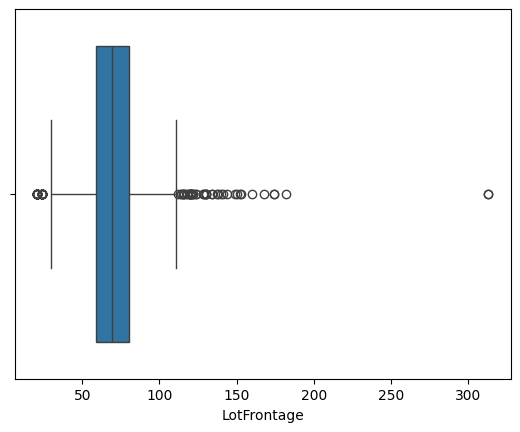

In [45]:
sns.boxplot(x=df.LotFrontage)

<Axes: xlabel='LotFrontage', ylabel='Count'>

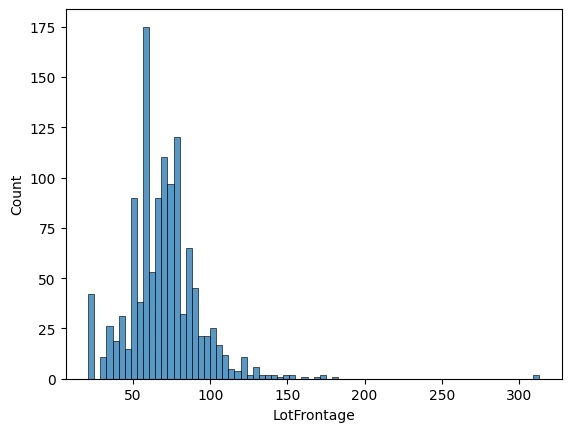

In [46]:
sns.histplot(x=df.LotFrontage)

In [47]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

### Признак `Electrical`

In [48]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

Electrical    0.068493
dtype: float64

In [49]:
df[df.Electrical.isna()]['Electrical']

Id
1380    NaN
Name: Electrical, dtype: object

In [50]:
df.at[1380, 'Electrical'] = df.Electrical.mode()

In [51]:
nn_features_percents = count_nn_feat_percents(df)
nn_features_percents

Series([], dtype: float64)

## 2) EDA

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

### Работа с первыми 20-ю признаками 
В некоторых признаках слишком много уникальных знечений, поэтому было решено заменить их

In [53]:
df.iloc[:, : 20]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle
Id,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable


In [54]:
df.iloc[:, : 20].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   LotShape      1460 non-null   object 
 6   LandContour   1460 non-null   object 
 7   Utilities     1460 non-null   object 
 8   LotConfig     1460 non-null   object 
 9   LandSlope     1460 non-null   object 
 10  Neighborhood  1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Condition2    1460 non-null   object 
 13  BldgType      1460 non-null   object 
 14  HouseStyle    1460 non-null   object 
 15  OverallQual   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  YearBuilt     1460 non-null   int64  
 18  YearRemodAdd  1460 non-null   int

In [ ]:
df.iloc[:, : 20]

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle
Id,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable
1457,RL,85.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable
1458,RL,66.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable


In [56]:
#feats_gr1 = [df[col].value_counts() for col in df.iloc[:, : 20].select_dtypes(exclude='int64')]

In [57]:
df['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [58]:
df['Neighborhood'].value_counts().head(4)

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Name: count, dtype: int64

In [59]:
largest_neighbors = df['Neighborhood'].value_counts().head(4).to_dict()
largest_neighbors

{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100}

In [60]:
df.Neighborhood = df.Neighborhood.apply(lambda x: x if x in largest_neighbors.keys() else 'Other')

In [61]:
df.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [62]:
df.Street = df.Street.apply(lambda x: 1 if x == 'Pave' else 0)

In [63]:
list_no_encode = ['LotFrontage', 'Street']

In [79]:
df.iloc[:, : 20]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle
Id,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable
2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,Other,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable
3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable
4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,Other,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable
5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,Other,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable
1457,20,RL,85.0,13175,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable
1458,70,RL,66.0,9042,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable


### Признаки 20-40

In [64]:
df.iloc[:, 20:40]

,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir
Id,,,,,,,,,,,,,,,,,,,,
1,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y
2,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y
3,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y
4,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y
5,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y
1457,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y
1458,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y


Нужно
*  `RoofMatl, Exterior1st, Exterior2nd, Foundation, Heating` - уменьшить количество уникальных значений
*  `ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, CentralAir` - сделать LabelEncoding

In [65]:
# RoofMatl, Exterior1st, Exterior2nd, Foundation, Heating

largest = df['RoofMatl'].value_counts() #.head(4).to_dict()
largest

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [66]:
df['RoofMatl'] = df['RoofMatl'].apply(lambda x: 1 if x == 'CompShg' else 0)

In [67]:
largest = df['Exterior1st'].value_counts().head(5).to_dict()
largest

{'VinylSd': 515,
 'HdBoard': 222,
 'MetalSd': 220,
 'Wd Sdng': 206,
 'Plywood': 108}

In [68]:
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: x if x in largest.keys() else 'Other')

In [69]:
largest = df['Exterior2nd'].value_counts().head(5).to_dict()
largest

{'VinylSd': 504,
 'MetalSd': 214,
 'HdBoard': 207,
 'Wd Sdng': 197,
 'Plywood': 142}

In [70]:
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: x if x in largest.keys() else 'Other')

In [71]:
largest = df['Foundation'].value_counts().head(3).to_dict()
largest

{'PConc': 647, 'CBlock': 634, 'BrkTil': 146}

In [72]:
df['Foundation'] = df['Foundation'].apply(lambda x: x if x in largest.keys() else 'Other')

In [73]:
largest = df['Heating'].value_counts()
largest

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [74]:
# CentralAir Y = 1, N = 0
df['Heating'] = df['Heating'].apply(lambda x: 1 if x == 'GasA' else 0)

In [75]:
df['CentralAir'] =df['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

In [76]:
encoding_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}

In [77]:
df['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64

In [78]:
# ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC']:
    df[col] = df[col].map(encoding_map)

### Признаки 40-60

In [121]:
df.iloc[:, 40:60]

,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars
Id,,,,,,,,,,,,,,,,,,,,
1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2
2,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2
3,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2
4,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3
5,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2
1457,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2
1458,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1


Нужно:
* `Electrical, Functional` - оставить только два признака
* `GarageType` - оставить три признака
* `KitchenQual, FireplaceQu` - сделать маппинг

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int64')


In [ ]:
df['Electrical'].value_counts() 

GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64

In [135]:
# Electrical, Functional
# df['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
df['Electrical'] = df['Electrical'].apply(lambda x: x == 'SBrkr').astype(int)

C:\Users\swang\AppData\Local\Temp\ipykernel_27332\1047604668.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Electrical'] = df['Electrical'].apply(lambda x: x == 'SBrkr').astype(int)


In [136]:
df['Electrical']

Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    0
1460    1
Name: Electrical, Length: 1460, dtype: int64

In [ ]:
df['Functional']

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [140]:
df['Functional'] = df['Functional'].apply(lambda x: 1 if x =='Typ' else 0)

In [143]:
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [144]:
df['GarageType'].value_counts().head(3).index

Index(['Attchd', 'Detchd', 'BuiltIn'], dtype='object', name='GarageType')

In [148]:
df['GarageType'] = df['GarageType'].apply(lambda x: x if x in df['GarageType'].value_counts().head(2).index else 'Other')

In [149]:
# KitchenQual, FireplaceQu
encoding_map

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

In [154]:
df['KitchenQual'] = df['KitchenQual'].map(encoding_map)

In [155]:
df['FireplaceQu'] = df['FireplaceQu'].map(encoding_map)

### Признаки 60 - последний

In [122]:
df.iloc[:, 60:]

,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage
Id,,,,,,,,,,,,,,,,,
1,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1
2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1
3,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1
4,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1
5,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,1
1457,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,1
1458,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,1


Нужно:
* `GarageQual, GarageCond` - маппинг
* `SaleType` - оставить 3 значения
* `SaleCondition` - оставить 4 значения

In [157]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [158]:
# GarageQual, GarageCond

df['GarageQual'] = df['GarageQual'].map(encoding_map)
df['GarageCond'] = df['GarageCond'].map(encoding_map)

In [160]:
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [163]:
df['SaleType'] = df['SaleType'].apply(lambda x: x if x in df['SaleType'].value_counts().head(2).index else 'Other')

In [167]:
df.SaleCondition = df.SaleCondition.apply(lambda x: x if x in df.SaleCondition.value_counts().head(3).index else 'Other').value_counts()

In [168]:
df.iloc[:, :20]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle
Id,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable
2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,Other,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable
3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable
4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,Other,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable
5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,Other,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable
1457,20,RL,85.0,13175,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable
1458,70,RL,66.0,9042,1,Reg,Lvl,AllPub,Inside,Gtl,Other,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable


In [ ]:
# Condition1, Condition2, RoofStyle

In [187]:
df['Condition1'] = df['Condition1'].apply(lambda x: 1 if x == 'Norm' else 0)
df['Condition2'] = df['Condition2'].apply(lambda x: 1 if x == 'Norm' else 0)

In [192]:
df.RoofStyle = df.RoofStyle.apply(lambda x: x if x in df.RoofStyle.value_counts().head(2).index else 'Other')

### Проверка на выбросы

In [ ]:
# Из первых признаков 'MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd'
df[['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd']]

,MSSubClass,LotArea,YearBuilt,YearRemodAdd
Id,,,,
1,60,8450,2003,2003
2,20,9600,1976,1976
3,60,11250,2001,2002
4,70,9550,1915,1970
5,60,14260,2000,2000
...,...,...,...,...
1456,60,7917,1999,2000
1457,20,13175,1978,1988
1458,70,9042,1941,2006


In [222]:
# colms = [['MSSubClass', 'LotArea'], ['YearBuilt', 'YearRemodAdd']]
# colms[0][1]

df[colms[0][0]]

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: int64

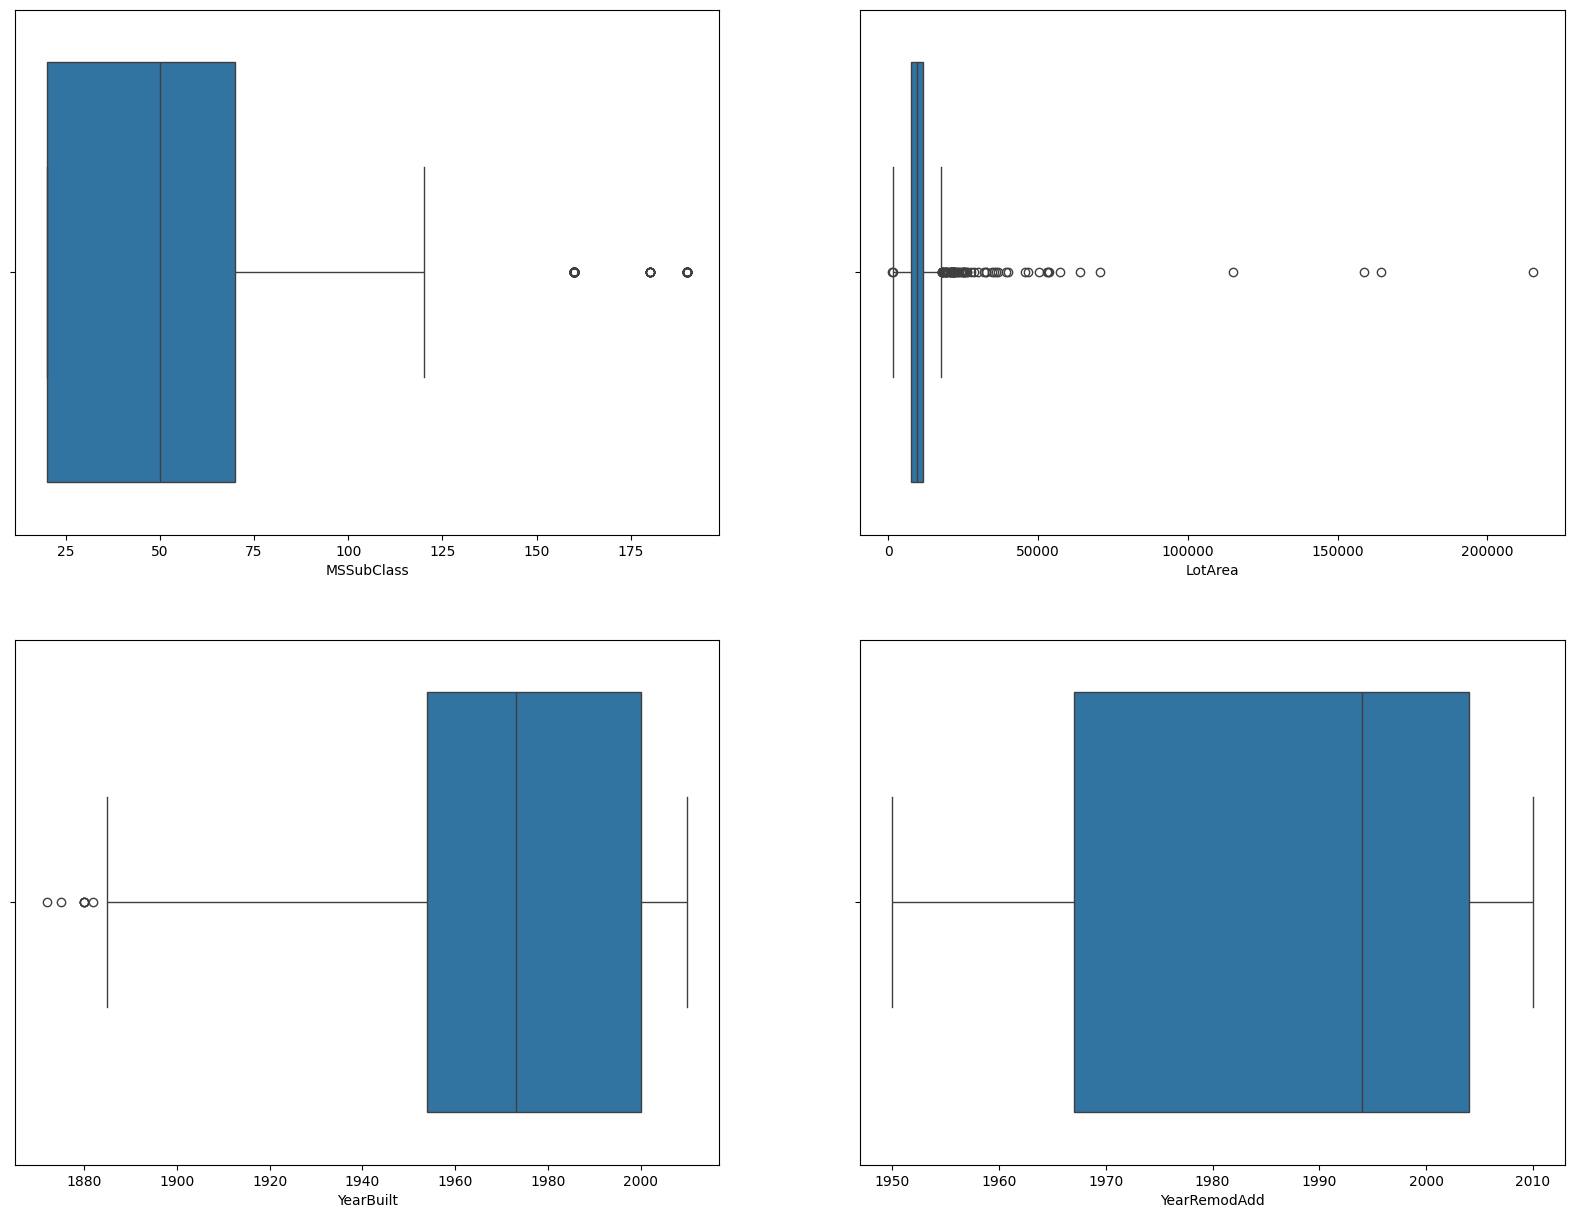

In [227]:
f, axes = plt.subplots(2, 2, figsize=[20, 15])

colms = [['MSSubClass', 'LotArea'], ['YearBuilt', 'YearRemodAdd']]

for ver_ax_num in range(2):
    for hor_ax_num in range(2):
        sns.boxplot(x=df[colms[ver_ax_num][hor_ax_num]], ax=axes[ver_ax_num, hor_ax_num])


# sns.boxplot(x=df['MSSubClass'], ax=axes[0, 0])
# sns.boxplot(x=df['LotArea'], ax=axes[0, 1])
# sns.boxplot(x=df['YearBuilt'], ax=axes[1, 0])
# sns.boxplot(x=df['YearRemodAdd'], ax=axes[1, 1])

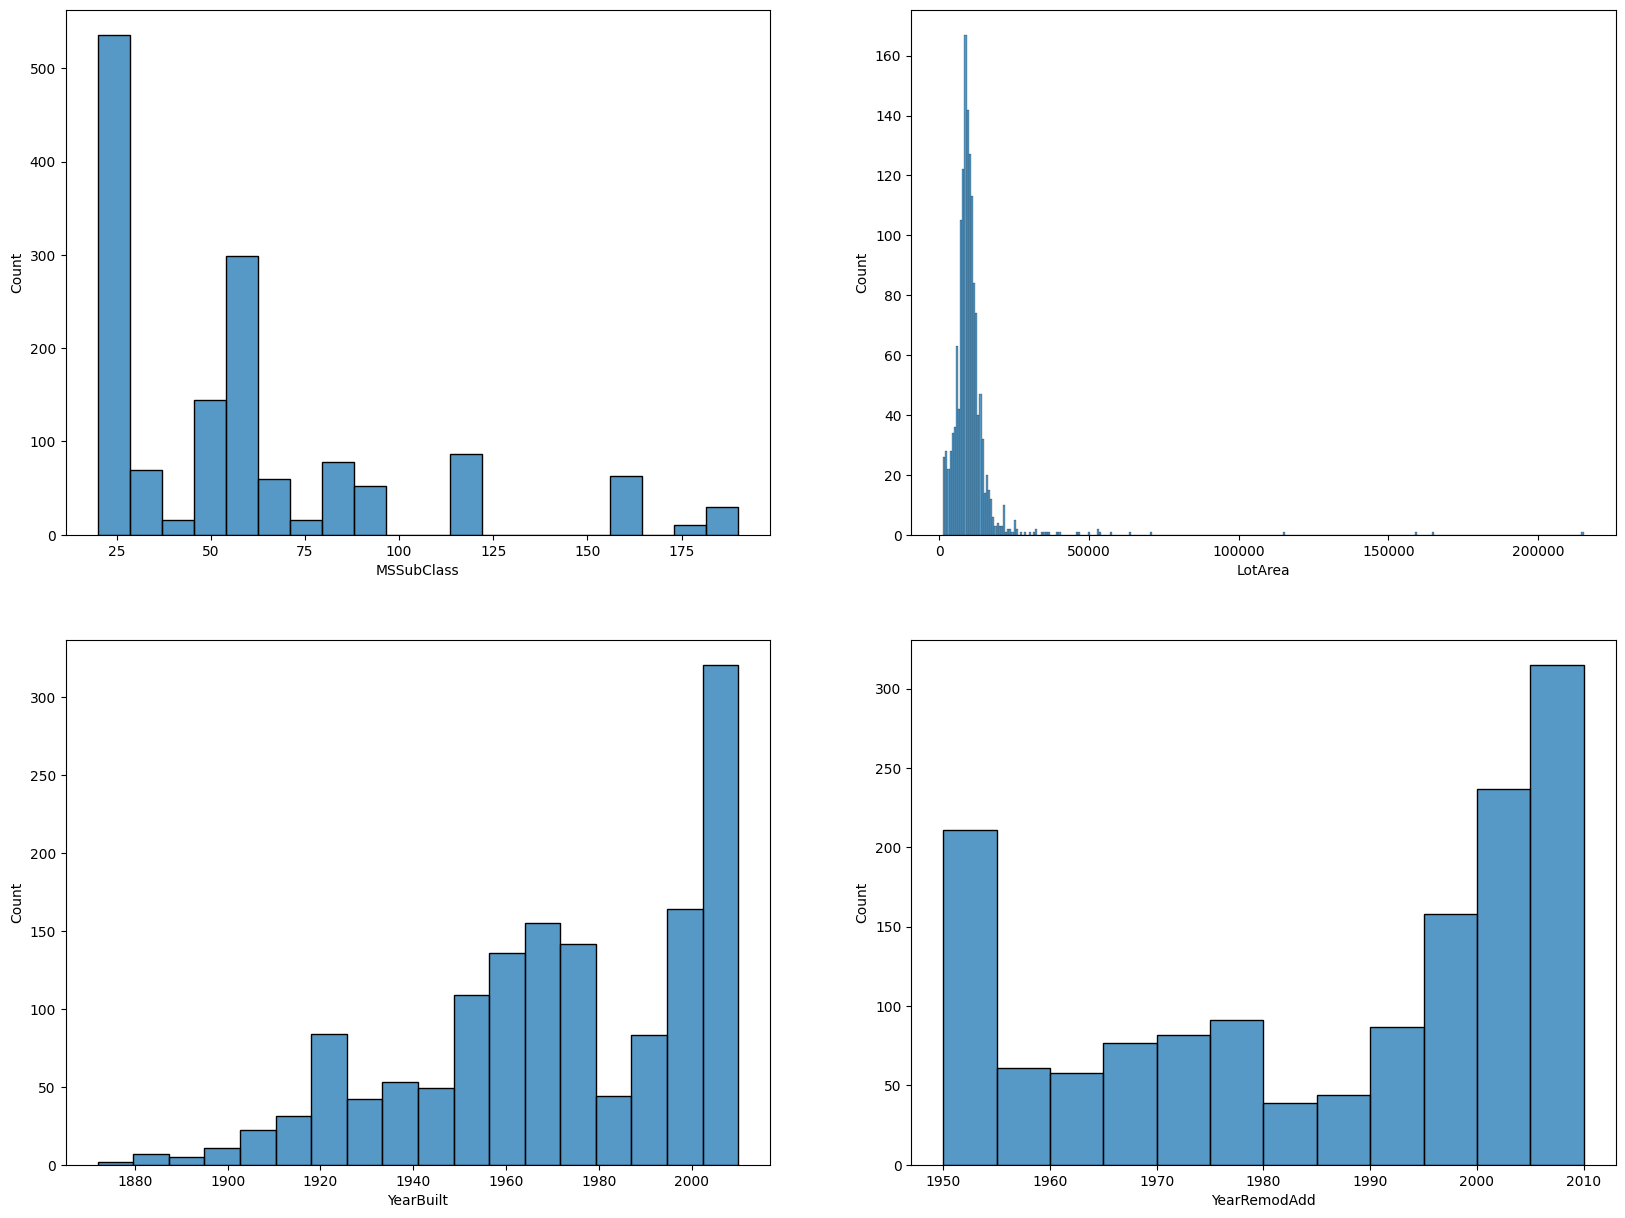

In [228]:
f, axes = plt.subplots(2, 2, figsize=[20, 15])

colms = [['MSSubClass', 'LotArea'], ['YearBuilt', 'YearRemodAdd']]

for ver_ax_num in range(2):
    for hor_ax_num in range(2):
        sns.histplot(x=df[colms[ver_ax_num][hor_ax_num]], ax=axes[ver_ax_num, hor_ax_num])